In [3]:
import numpy as np
import astropy.units as u
from astropy.io import fits
from pathlib import Path
from importlib import reload
import poppy

import misc

Nacts = 48
dm_diam = 46.3*u.mm
act_spacing = 0.9906*u.mm

dmdir = Path('/groups/douglase/kians-data-files/roman-cgi-phasec-data/dm-acts')
dm1_piston_fname = str(dmdir/'hlc_dm1.fits')
dm2_piston_fname = str(dmdir/'hlc_dm2.fits')

dm1 = poppy.ContinuousDeformableMirror(dm_shape=(Nacts,Nacts), name='DM1', actuator_spacing=act_spacing, radius=dm_diam/2,
                                       influence_func=str(dmdir/'proper_inf_func.fits'))
dm1_piston_map = fits.getdata(dm1_piston_fname)
dm1.set_surface(dm1_piston_map)

dm2 = poppy.ContinuousDeformableMirror(dm_shape=(Nacts,Nacts), name='DM2', actuator_spacing=act_spacing, radius=dm_diam/2,
                                       influence_func=str(dmdir/'proper_inf_func.fits'))
dm2_piston_map = fits.getdata(dm2_piston_fname)
dm2.set_surface(dm2_piston_map)

dm1s = ['hlc_dm1.fits', dm1]
dm2s = ['hlc_dm2.fits', dm2]

# misc.display_dm(dm1)
# misc.display_dm(dm2)


In [30]:
import numpy as np
import astropy.units as u
from astropy.io import fits
from pathlib import Path
from importlib import reload
import poppy

import misc

from poppy_roman_cgi_phasec import run
reload(run)

wavelength_c = 575e-9*u.m
wavelengths = np.linspace(wavelength_c - wavelength_c*.10/2, wavelength_c + wavelength_c*.10/2, 3)

cgi_dir = Path('/groups/douglase/kians-data-files/roman-cgi-phasec-data')

psfs, wfs = run.run_multi(ncpus=16, mode='HLC575', quiet=False,
                          wavelength=wavelengths,
#                           dm1 = 'hlc_dm1.fits', dm2='hlc_dm2.fits',
#                           dm1=dm1s, dm2=dm2s,
                          cgi_dir=cgi_dir,
#                           return_intermediates=True, 
                         )



run_hlc
Propagating wavelength 575.000 nm.
PSF calculated in 6.66s


In [31]:
wfs

In [24]:
wfs[0][0].wavelength

<Quantity 5.75e-07 m>

In [23]:
wfs[1][0].wavelength

TypeError: 'FresnelWavefront' object is not subscriptable

In [9]:
wfs[0].wavelength

<Quantity 5.4625e-07 m>

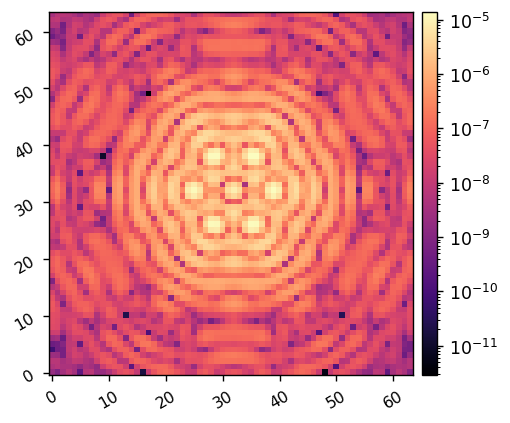

In [8]:
misc.myimshow(wfs[0].intensity, lognorm=True)